<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pandas as pd
pd.set_option("display.precision", 10)

In [7]:
csv_folders = glob.glob('results/No_Data_Aug/*')
df_v_loss = pd.DataFrame(index=range(100))
df_t_loss = pd.DataFrame(index=range(100))
for folder in csv_folders:
    if len(glob.glob(folder+'\*.csv'))>0:
        csv = glob.glob(folder+'\*.csv')[0]
        name = csv.split('\\')[-1][:-4]

        df = pd.read_csv(csv,sep=';', float_precision='round_trip')
        df_v_loss[name] = df['val_loss']
        df_t_loss[name] = df['loss']

In [8]:
df_t_loss

,myronenko_cae_MSE_L2KReg_NoPlat,myronenko_cae_MSE_NoKReg_NoPlat,skip_con_cae_MSE_NoKReg_NoPlat,small_res_cae_MSE_full_pre_L2KReg_LRPlat,small_res_cae_MSE_full_pre_NoKReg_NoPlat,small_res_cae_MSE_original_NoKReg_NoPlat
0,0.0090028550,0.0032839354,0.0008487482,0.0040036580,0.0026008962,0.0034719384
1,0.0028605915,0.0008845936,0.0001610554,0.0012802627,0.0008173083,0.0010327862
2,0.0022696930,0.0005605005,0.0001194228,0.0009493355,0.0005508056,0.0007473975
3,0.0019925535,0.0004088370,0.0000995136,0.0008230496,0.0004079301,0.0005977931
4,0.0018592138,0.0003130863,0.0000942042,0.0007488260,0.0003478339,0.0005069759
...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pd.DataFrame((df_v_loss.min(),df_v_loss.apply(lambda x: x.argmin()))).transpose().sort_values(0)

,0,1
skip_con_cae_MSE_NoKReg_NoPlat,0.0000110335,32.0
small_res_cae_MSE_full_pre_NoKReg_NoPlat,0.0000392472,22.0
small_res_cae_MSE_full_pre_L2KReg_LRPlat,0.0001097200,75.0
small_res_cae_MSE_original_NoKReg_NoPlat,0.0001111093,21.0
myronenko_cae_MSE_NoKReg_NoPlat,0.0001839338,8.0
myronenko_cae_MSE_L2KReg_NoPlat,0.0014740063,27.0


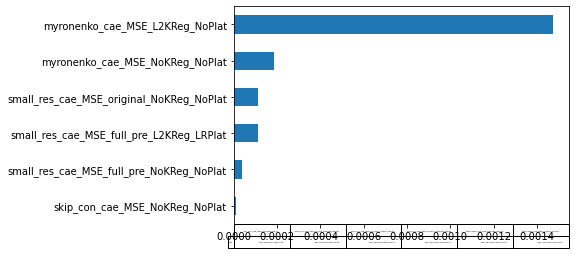

In [10]:
df_v_loss.min().sort_values().plot(kind='barh',table=True);

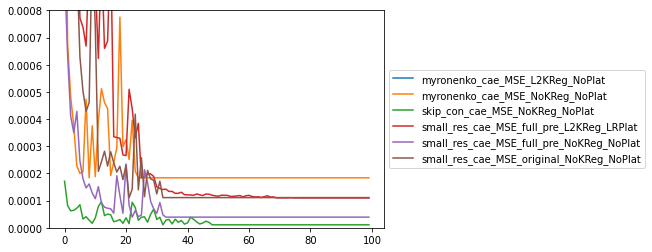

In [11]:
df_v_loss.fillna(df_v_loss.min(), inplace=True)
df_v_loss.plot(ylim=(0,0.0008)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

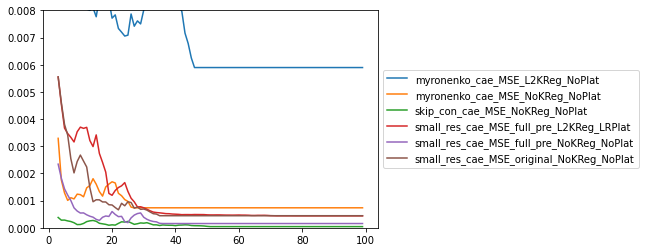

In [12]:
df_v_loss.rolling(4, axis=0).sum().plot(ylim=(0,0.008)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

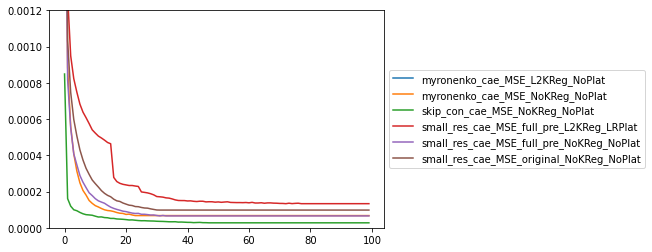

In [13]:
df_t_loss.fillna(df_t_loss.min(), inplace=True)
df_t_loss.plot(ylim=(0,0.0012)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))